# Machine Learning Challenge

#### This notebook will guide you through this challenge ordered by the following steps:
1. Pre-processing and feature engineering
2. Clustering (Question 1 and 2)
3. Classification (Question 3 and 4)
4. Regression 
5. Bonus

#### You can also execute the python scripts on the repository to see the results, but here you can have a better visualization of the process.

### NOTE: Run each cell in order to visualize the results

### The following librarys are going to be used through this notebook

* Pandas
* Numpy
* Matplotlib
* Seaborn
* Scikit-learn


In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

sns.set(style='whitegrid')
%matplotlib inline

In [338]:
# Functions to return information about the pandas dataset
def print_num(df):
    print(f'This dataset has {df.shape[0]} rows and {df.shape[1]} columns')
    
def data_types(df):
    print(df.dtypes.value_counts())

### Info dataset
#### Dataset from 'heroes_information.csv'

In [339]:
info = pd.read_csv('datasets/heroes_information.csv', index_col=[0]) # index_col=[0] to get rid of first column

print_num(info)
data_types(info)
info.head()

This dataset has 734 rows and 10 columns
object     8
float64    2
dtype: int64


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


#### Looking for duplicated hero names

In [340]:
# Check for duplicate names
info[info['name'].duplicated(keep='first')]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
23,Angel,Male,-,Vampire,-,-99.0,Dark Horse Comics,-,good,-99.0
48,Atlas,Male,blue,God / Eternal,Brown,198.0,DC Comics,-,bad,126.0
50,Atom,Male,-,-,-,-99.0,DC Comics,-,good,-99.0
63,Batgirl,Female,green,Human,Red,170.0,DC Comics,-,good,57.0
69,Batman,Male,blue,Human,Black,178.0,DC Comics,-,good,77.0
97,Black Canary,Female,blue,Metahuman,Blond,170.0,DC Comics,-,good,59.0
116,Blizzard,Male,-,-,Brown,-99.0,Marvel Comics,-,bad,-99.0
123,Blue Beetle,Male,-,-,-,-99.0,DC Comics,-,good,-99.0
156,Captain Marvel,Male,blue,Human,Black,193.0,DC Comics,-,good,101.0
260,Firestorm,Male,blue,Human,Auburn,188.0,DC Comics,-,good,91.0


#### Removing the duplicated heroes
##### NOTE: Some heroes have the same name but are different characters, it was chosen remove all duplicates but a more selective approach can be made.

In [341]:
# Remove duplicates
info = info.drop_duplicates(subset='name', keep='first')

print_num(info)

This dataset has 715 rows and 10 columns


### Power dataset
#### Dataset from super_hero_powers.csv'

In [342]:
power = pd.read_csv('datasets/super_hero_powers.csv')
print_num(power)
data_types(power)
power.head()

This dataset has 667 rows and 168 columns
bool      167
object      1
dtype: int64


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Removing the duplicated heroes
##### There isn't duplicated heroes on this dataset

In [343]:
# Check for duplicate names
power[power['hero_names'].duplicated(keep='first')]

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient


### Merge info and power datasets

#### Because the datasets have a different number of heroes, the intersection between the two based on the heroes name was made 

In [344]:
# Get intersection of names
names_info = set(info['name'])
names_power = set(power['hero_names'])

intersec = list(names_info.intersection(names_power))

In [345]:
# Merge both datasets by name, rename hero_names column to name
df1 = info[info['name'].isin(intersec)]
df2 = power[power['hero_names'].isin(intersec)]

df2.rename(columns={'hero_names':'name'}, inplace=True)

info_power = pd.merge(df1, df2, on="name")

print_num(info_power)
data_types(info_power)

info_power.head(10)

This dataset has 643 rows and 177 columns
bool       167
object       8
float64      2
dtype: int64


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0,...,False,False,False,False,False,False,False,False,False,False
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,False
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0,...,False,False,False,False,False,False,False,False,False,False
8,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0,...,False,False,False,False,False,False,False,False,False,False
9,Agent Zero,Male,-,-,-,191.0,Marvel Comics,-,good,104.0,...,False,False,False,False,False,False,False,False,False,False


### Feature Engineering

#### In this section the data will be prepared to be used by the algorithms:
* The missing values will be replaced
* The categorical data will be treated
* All values will be normalized

#### Looking for invalid values

In [346]:
# Replacing invalid values '-' and -99 for NaN
info_power = info_power.replace('-', np.nan).replace(-99, np.nan)

missing = info_power.isna()

print('Column -', 'number of missing values')
for c, i in missing.iteritems():
    if i.sum() > 0:
        print(c + ' -', i.sum())

Column - number of missing values
Gender - 17
Eye color - 126
Race - 243
Hair color - 128
Height - 164
Publisher - 13
Skin color - 572
Alignment - 7
Weight - 186


#### Transformations by feature
1. Gender:
    - Rows with missing values were removed;
2. Eye color / Race / Hair color / Publisher:  
    - The categories that contained more information (more heroes) were kept, and the rest along with the missing values were grouped into a category 'other (name of feature)'. Then each new category were transformed in a column of True or False, to avoid bias with euclidian distance;
3. Height / Weight:
    - The undefined values were redefined with median of the feature data. Then normalized between 0 and 1, to avoid bias with euclidian distance;
4. Skin color:
    - Because of the large number of missing data this column was dropped;
5. Alignment:
    - Rows with missing values and neutral category value were removed;

#### Run the next cell to visualize the before and after of each feature

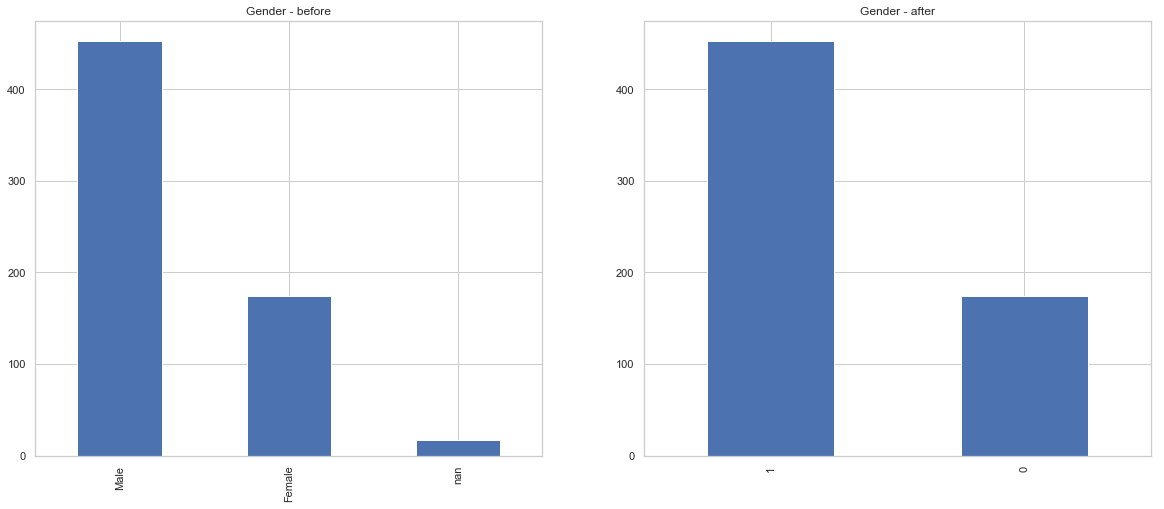

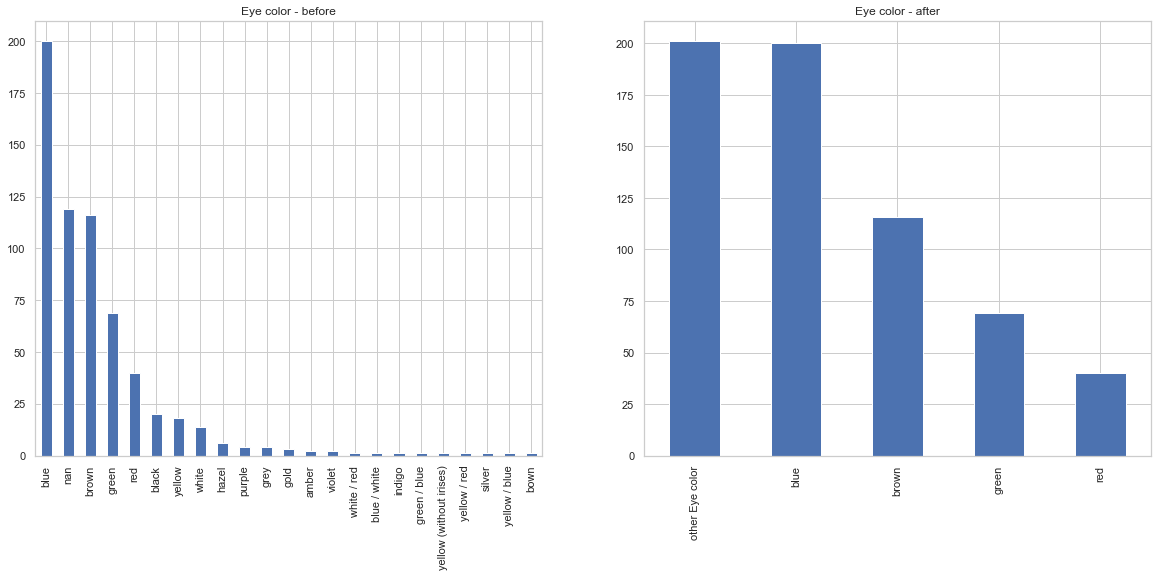

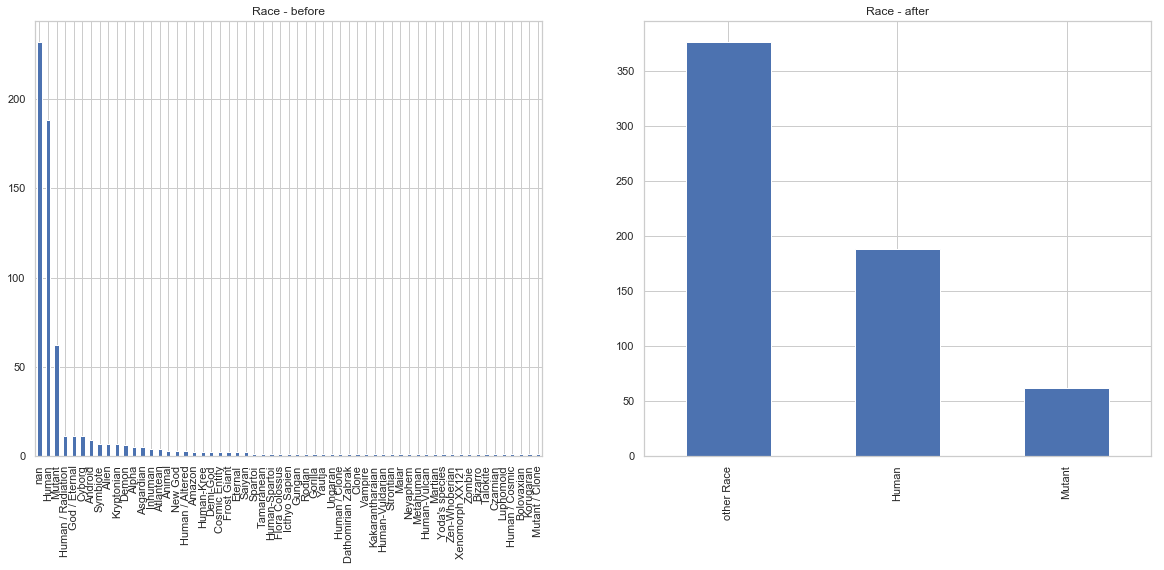

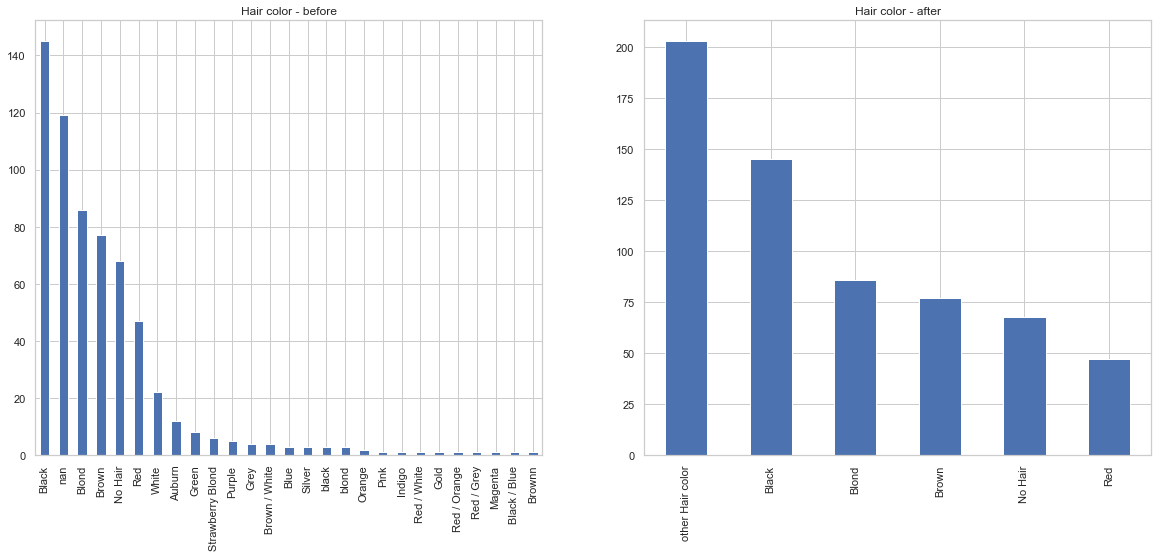

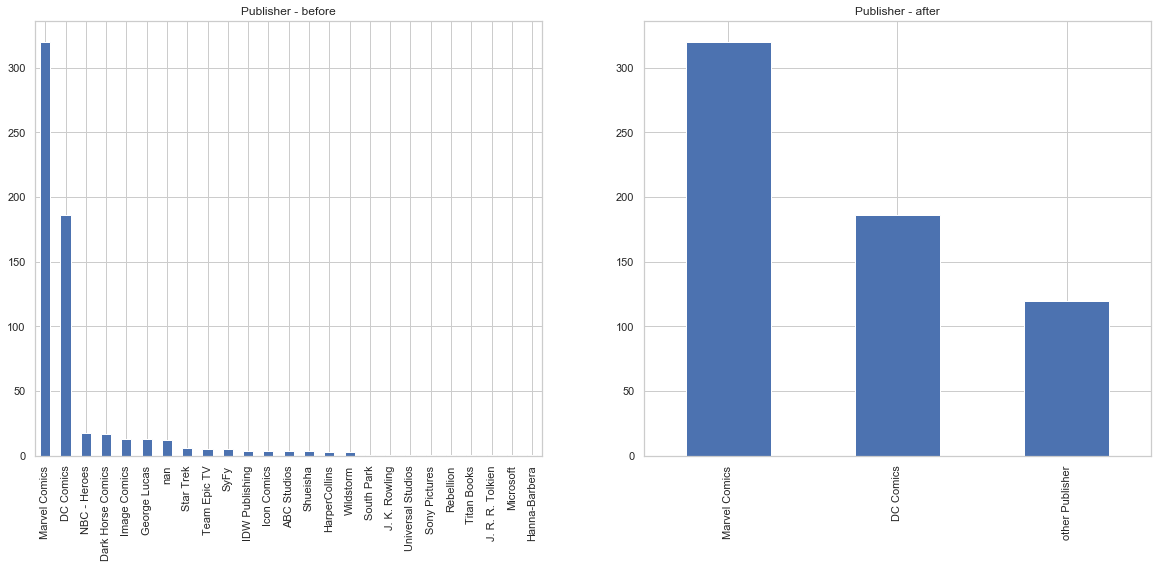

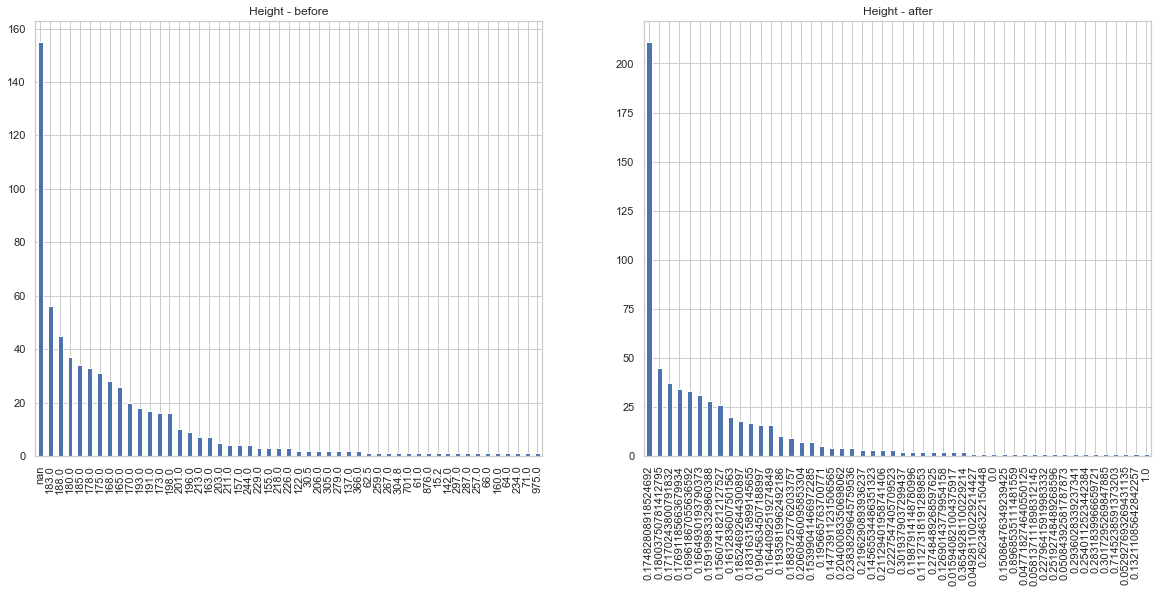

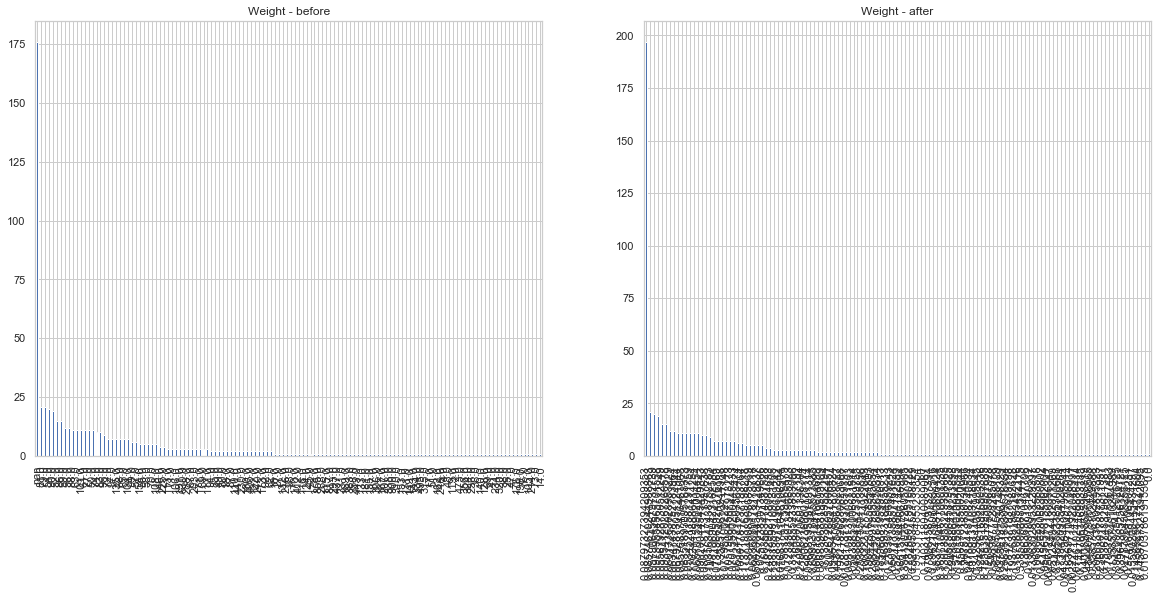

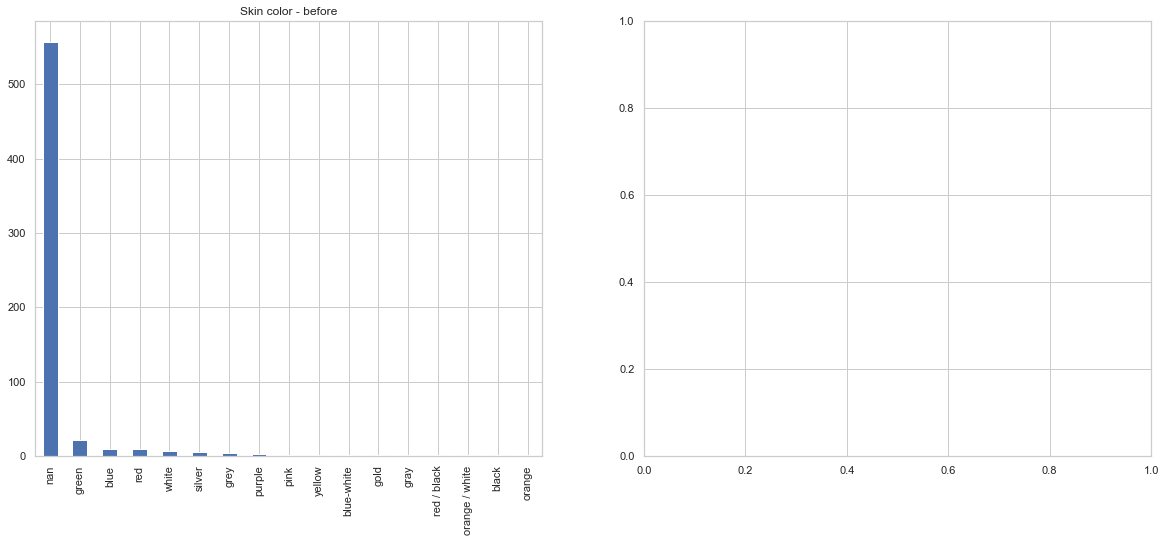

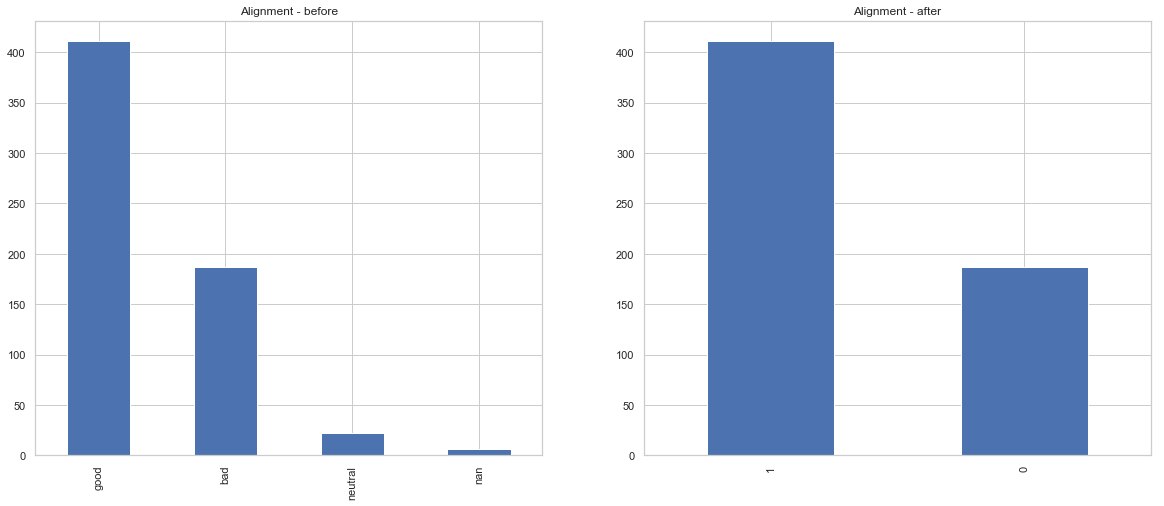

In [347]:
le = preprocessing.LabelEncoder()

# Gender
feature = 'Gender'

fig, axs = plt.subplots(1, 2, figsize=(20,8))

info_power[feature].value_counts(dropna=False).plot.bar(ax=axs[0], title=f'{feature} - before')

info_power = info_power.dropna(subset=[feature])

info_power[feature] = le.fit_transform(info_power[feature])

info_power[feature].value_counts(dropna=False).plot.bar(ax=axs[1], title=f'{feature} - after')

# Eye color / Race / Hair color / Publisher
features = ['Eye color', 'Race', 'Hair color', 'Publisher']
new_columns = [['blue', 'brown', 'green', 'red'],
               ['Human', 'Mutant'], 
               ['Black', 'Blond', 'Brown', 'No Hair', 'Red'], 
               ['Marvel Comics', 'DC Comics']]

for feature, keep_features in zip(features, new_columns):
    fig, axs = plt.subplots(1, 2, figsize=(20,8))
    
    info_power[feature].value_counts(dropna=False).plot.bar(ax=axs[0], title=f'{feature} - before')
  
    other_feature = f'other {feature}'
  
    info_power[feature] = info_power[feature].apply(
        lambda x: other_feature if x not in keep_features else x)

    info_power[feature].value_counts(dropna=False).plot.bar(ax=axs[1], title=f'{feature} - after')
  
    # Remover coluna (É uma informação categórica, e será convertida em one-hot code).
    feat_column = info_power.pop(feature) 
    keep_features += [other_feature]

    for kf in keep_features:
        info_power[kf] = (feat_column == kf)*1.0

# Height / Weight
features = ['Height', 'Weight']

for feature in features:
    fig, axs = plt.subplots(1, 2, figsize=(20,8))
  
    info_power[feature].value_counts(dropna=False).plot.bar(ax=axs[0], title=f'{feature} - before')

    info_power[feature] = info_power[feature].replace(np.nan, info_power[feature].median())

    std = MinMaxScaler()
    info_power[feature] = std.fit_transform(info_power[[feature]])

    info_power[feature].value_counts(dropna=False).plot.bar(ax=axs[1], title=f'{feature} - after')
                                                      
# Skin color

feature = 'Skin color'

fig, axs = plt.subplots(1, 2, figsize=(20,8))

info_power[feature].value_counts(dropna=False).plot.bar(ax=axs[0], title=f'{feature} - before')

info_power = info_power.drop(columns=feature)

# Alignment
feature = 'Alignment'

fig, axs = plt.subplots(1, 2, figsize=(20,8))

info_power[feature].value_counts(dropna=False).plot.bar(ax=axs[0], title=f'{feature} - before')

info_power = info_power.dropna(subset=[feature])

info_power = info_power[info_power[feature] != 'neutral']

info_power[feature] = le.fit_transform(info_power[feature])

info_power[feature].value_counts(dropna=False).plot.bar(ax=axs[1], title=f'{feature} - after')                                                                               

#### Heroes super powers

#### For the heroes super powers the boolean data were changed to float

In [348]:
# Change True/False from power coluns to binary

power_cols = power.columns[1:].values
info_power[power_cols] = info_power[power_cols].astype(float)

info_power[power_cols].head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Processed dataset

In [349]:
print_num(info_power)
data_types(info_power)

info_power.to_csv('datasets/info_power_processed.csv', index=False)

info_power.head()

This dataset has 598 rows and 189 columns
float64    186
int64        2
object       1
dtype: int64


,name,Gender,Height,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,...,other Race,Black,Blond,Brown,No Hair,Red,other Hair color,Marvel Comics,DC Comics,other Publisher
0,A-Bomb,1,0.195666,1,0.488864,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,Abe Sapien,1,0.183163,1,0.070156,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,Abin Sur,1,0.176912,1,0.097996,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Abomination,1,0.195666,0,0.488864,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Abraxas,1,0.174828,0,0.087973,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Clustering

#### The objective of this module is to group the data from the pre-processed dataset
1. Question 1:

    - (1) The choosen algorithm is from the hierarchical field for clustering, the Agglomerative Hierarchical, this algorithm has an deterministic bottom-up approach based on a linkage criteria, because of that approach this tecnique has a better performance on finding the structure of the data, wich can be hard on this case because of the categorical and numeric values.

    - (2) Preprocessing for this step was performed in the pre-processing module, in this module columns with more than two categorical variables were transformed so that each column represents whether or not a hero has a feature (1 or 0). And the numerical data were normalized between 0 and 1. Thus all categories have the same weight within the Euclidean distance, avoiding bias.


2. Question 2:

    - To define the number of clusters two metrics were chosen to evaluate the clusters found by the algorithm. The metrics were the silhouette and ch-index score, the two ponder between the internal and external variance of the groups, and are already well established in the literature. In order to consider the results of the two metrics, Pareto-Optimal approach was used to find a solution that maximizes the two metrics. The result can be seen in the figure 'images/clustering_results.png'.

In [350]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabaz_score

# Read pre-processsed dataset
df_clus = pd.read_csv('datasets/info_power_processed.csv')

X = df_clus.drop(columns='name')

# Executing the algorithm with the number of clusters going from 2 to 30
n_k = np.arange(2, 31)
models = [AgglomerativeClustering(k, linkage='average').fit(X)
          for k in n_k]

# Evaluating the results with the metrics
sils = [silhouette_score(X=X, labels=ag.labels_) for ag in models]
chs = [calinski_harabaz_score(X, ag.labels_) for ag in models]

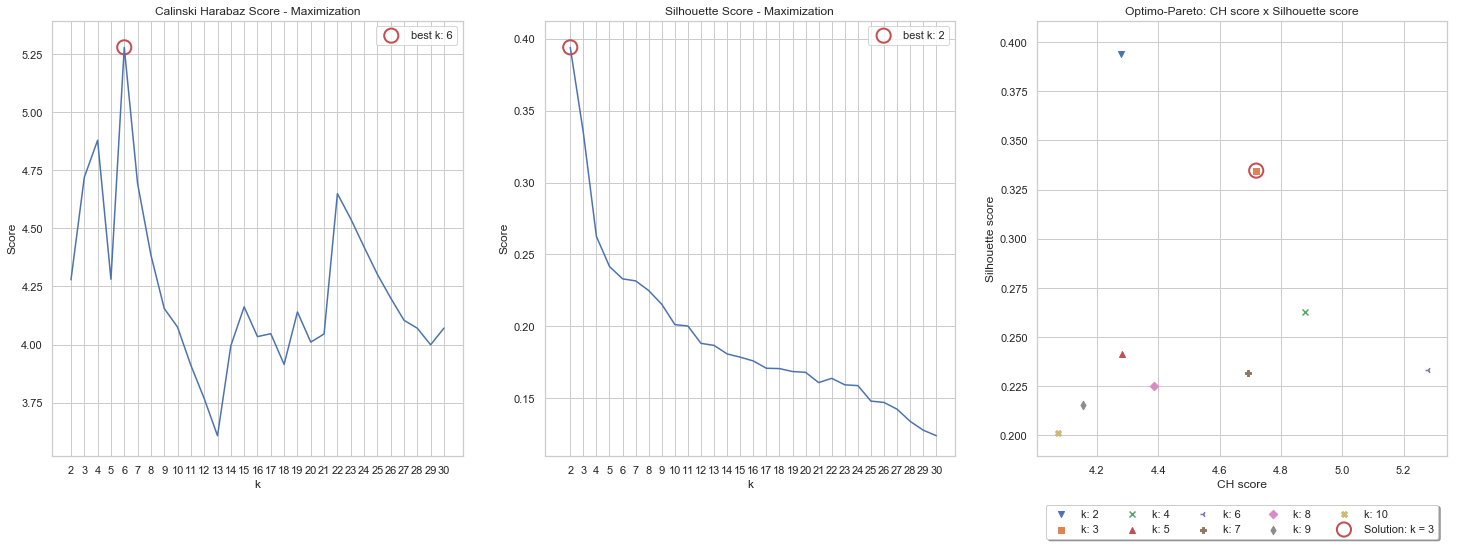

In [355]:
metrics = ['Calinski Harabaz Score - Maximization', 
            'Silhouette Score - Maximization']

f, axs = plt.subplots(1, 3, figsize=(25,8))

# Ploting the metrics and the Pareto-Optimal
for i, metric, results in zip(range(2), metrics, [chs, sils]):
    axs[i].plot(n_k, results)
    axs[i].set_xticks(n_k)
    axs[i].set_xlabel('k')
    axs[i].set_ylabel('Score')
    axs[i].set_title(metric)
    axs[i].scatter(np.argmax(results) + 2, np.max(results),
                s=200, facecolors='none', edgecolors='r',
                linewidth=2, label=f'best k: {np.argmax(results) + 2}')
    axs[i].legend()

markers = ['v', 's', 'x', '^', '3', 'P', 'D', 'd', 'X']
 
for xi, yi, k, m in zip(chs[:9], sils[:9], n_k[:9], markers):
    axs[2].scatter(xi, yi, label=f'k: {k}', marker=m)
    axs[2].set_xlabel('CH score')
    axs[2].set_ylabel('Silhouette score')
    axs[2].set_title('Optimo-Pareto: CH score x Silhouette score')

axs[2].scatter(chs[1], sils[1], s=200, facecolors='none',
               edgecolors='r', linewidth=2, label='Solution: k = 3')
  
axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), 
             fancybox=True, shadow=True, ncol=5)

### Classification

### Naive Bayes
#### The objective of this module is to classify the data from the pre-processed dataset, based on the alignment of each hero (good or bad), using the Naive Bayes algorithm.

3. Question 3:

    - (1) The Naive Bayes algorithm is a classifier based on the Bayes' theorem, which is based on conditional probability. It is a probabilistic algorithm that returns the probability of each entry belonging to a class. Two assumptions are made by this algorithm, the first is that the features are independent, and the second is that all features have an equal effect on the classification.
    
    - (2) Due to the large number of categorical variables and most of them having several categories, it was decided to reduce the number of categories and to transform each category into a column representing whether or not the hero has such a characteristic. Due to the same characteristics of the data set it was chosen to use the Multinomial Naive Bayes algorithm, which has a better performance with this type of data.
    
    - (3) Accuracy is being used as a metric to evaluate the model result,  

In [356]:
from sklearn.model_selection import train_test_split


# Read pre-processsed dataset
df = pd.read_csv('datasets/info_power_processed.csv')

X = df.drop(columns=['name', 'Alignment'])

# Classifying in good or bad
y = df['Alignment']

# Split dataset into training set and test set # 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3,random_state=109) 

In [357]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


# Initialize algorithm
clf = MultinomialNB()

#Training model
clf.fit(X_train, y_train)

#Predicting test cases 
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7222222222222222


### Random Forest
#### The objective of this module is to classify the data from the pre-processed dataset, based on the alignment of each hero (good or bad), using the Random Forest algorithm.

4. Question 4:

    - (1) It is a simple algorithm that has a good performance in most cases and can be used without the use of hyperparametres. Moreover, due to its structure in decision trees, it has the capacity to measure the relative importance of each feature for the classification.
    
    - (2) Comparing acuracy, the random forest algorithm had a slightly better result than the naive bayes. Random forest also has differences in relation to assumptions. While naive bayes consider that the variables are independent and of equal weight, random forest uses several decision trees to assign weights to the features, and due to the randomness of these trees the algorithm adds diversity to the process.

In [358]:
from sklearn.model_selection import train_test_split


# Read pre-processsed dataset
df = pd.read_csv('datasets/info_power_processed.csv')

X = df.drop(columns=['name', 'Alignment'])

# Classifying in good or bad
y = df['Alignment']

# Split dataset into training set and test set # 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), 
                                                    test_size=0.3,random_state=109)

In [359]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


# Initialize algorithm
clf = RandomForestClassifier(n_estimators = 100, random_state=109)

# Training model
clf.fit(X_train, y_train)

# Predicting test cases 
y_pred = clf.predict(X_test)
  
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred),'\n')

# Feature selection from model
sfm = SelectFromModel(clf, threshold=0.05)

# Train the selector
sfm.fit(X_train, y_train)

print('More important features selected:')
for feat_index in sfm.get_support(indices=True):
    print(X_train.columns[feat_index], clf.feature_importances_[feat_index])

Accuracy: 0.7555555555555555 

More important features selected:
Height 0.05767807367055647
Weight 0.07563687554641879


### Regression
#### The objective of this module is to predict the heroes weight given the data from the pre-processed dataset.

5. Beyond Good and Evil:

    - (1) The algorithm chosen for regression was random forest, for the same reasons it was used for classification, besides its good performance working with binary and numerical features.

    - (2) The metric chosen to evaluate the model was the R-squared score, which evaluates the variance explained by the model.

In [360]:
from sklearn.model_selection import train_test_split


# Read pre-processsed dataset
df = pd.read_csv('datasets/info_power_processed.csv')

X = df.drop(columns=['name', 'Weight'])

# Predict the weight
y = df['Weight']

# Split dataset into training set and test set # 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), 
                                                    test_size=0.3,random_state=109) 

In [361]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


# Initialize algorithm
regr = RandomForestRegressor(random_state=109, n_estimators=100)

# Training model
regr.fit(X_train, y_train)

# Predicting test cases 
y_pred = regr.predict(X_test)

# Evaluate the variance score
print(f'R^2 score: {r2_score(y_test, y_pred)}')

# Feature selection from model
sfm = SelectFromModel(regr, threshold=0.05)

# Train the selector
sfm.fit(X_train, y_train)

print('\nMore important features selected:')
for feat_index in sfm.get_support(indices=True):
    print(X_train.columns[feat_index], clf.feature_importances_[feat_index])

R^2 score: 0.25365090742085306

More important features selected:
Height 0.05767807367055647


##### The R-square result is showing that the model is not succeeding in weight prediction.

### Analysis

#### Aspects of the dataset that pose problems to clustering, classification, regression

* For clustering, features with categorical information were posed as a problem, even turning the categories into numeric data ('no hair' = 2), category 0 would be more similar to category 1 than category 2, taking into consideration distance Euclidean, which is not true in this case. To avoid this problem, the categories were transformed into columns that represented whether or not the hero had such information. Other problem for clustering was the range of 'weight' and 'height', because all the category values were transformed to binary, was nedeed to normalize this features to be inside this range. Another problem for clustering was the range of values for 'Weight' and 'Height', because the category values were converted to binary, it was necessary to normalize the features to be within that range.

* For classification and regression, the high dimensionality of the data set together with the approximation used to deal with missing values can generate an overfitting problem.

### Bonus

#### In this section some aspects of the features on the dataset will be explored.


#### The info and power datasets will be merged again and in this section all the missing values will be removed
* The columns Eye color, Race, Hair color, Height and Weight will not be used

In [362]:
info = pd.read_csv('datasets/heroes_information.csv', index_col=[0]) # index_col=[0] to get rid of first column

# Duplications were visualized in the heroes_information data, so it was chosen to remove these duplications
info = info.drop_duplicates(subset='name', keep='first')

power = pd.read_csv('datasets/super_hero_powers.csv')

# Because the datasets have a different number of heroes, the intersection between the two based on the heroes name was made 
names_info = set(info['name'])
names_power = set(power['hero_names'])

intersec = list(names_info.intersection(names_power))

df1 = info[info['name'].isin(intersec)]
df2 = power[power['hero_names'].isin(intersec)]

df2.rename(columns={'hero_names':'name'}, inplace=True)

# Merge both datasets by name
bonus_df = pd.merge(df1, df2, on="name")

# Drop columns that will not be used
bonus_df = bonus_df.drop(columns=['Skin color', 'Eye color', 
                                  'Race', 'Hair color', 'Height', 'Weight'])

# Replace all missing values with NaN
bonus_df = bonus_df.replace('-', np.nan)

# Drop missing values
bonus_df = bonus_df.dropna()

bonus_df.head()

/home/paulorocha/Documents/AccentureChallenge/env/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,name,Gender,Publisher,Alignment,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,Marvel Comics,good,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,Dark Horse Comics,good,True,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,DC Comics,good,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,Marvel Comics,bad,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,Marvel Comics,bad,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


### Visualization of the relation betwen Publisher and Alignment.
* Number of good and bad heroes per Publisher
* Only showing Publishers with at least 2 good and 2 bad heroes

Text(0, 0.5, 'Number of heroes')

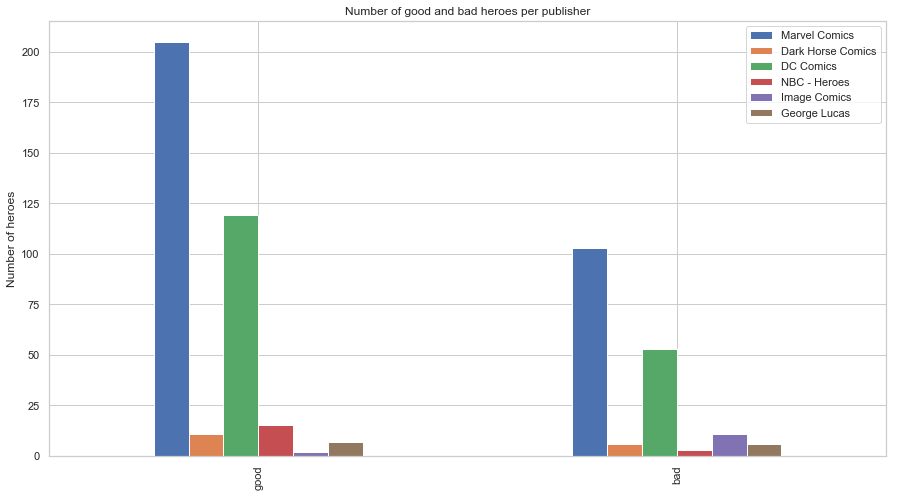

In [363]:
# Get publishers values
publishers = bonus_df['Publisher'].unique()

# removing neutral
bonus_df = bonus_df[bonus_df['Alignment'] != 'neutral']

df_plot = pd.DataFrame()
for publisher in publishers:
    df_plot[publisher] = bonus_df['Alignment'][bonus_df['Publisher'] == publisher].value_counts()

df_plot[df_plot[publishers] > 1].dropna(axis=1).plot.bar(figsize=(15,8))
plt.title('Number of good and bad heroes per publisher')
plt.ylabel('Number of heroes')

### Visualization of the relation betwen Publisher and Gender.
* Number of male and female heroes per Publisher
* Only showing Publishers with at least 2 male and 2 female heroes

Text(0, 0.5, 'Number of heroes')

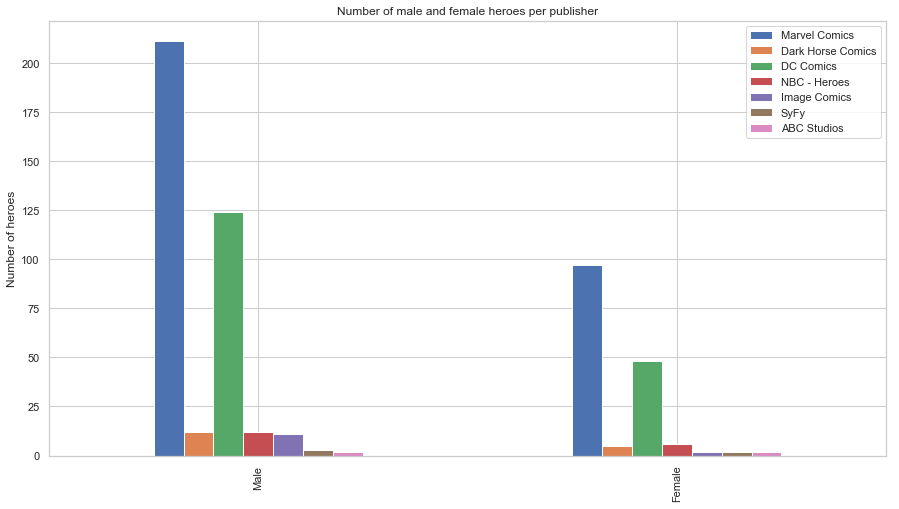

In [364]:
# Get publishers values
publishers = bonus_df['Publisher'].unique()

df_plot = pd.DataFrame()
for publisher in publishers:
    df_plot[publisher] = bonus_df['Gender'][bonus_df['Publisher'] == publisher].value_counts()

df_plot[df_plot[publishers] > 1].dropna(axis=1).plot.bar(figsize=(15,8))
plt.title('Number of male and female heroes per publisher')
plt.ylabel('Number of heroes')

### Visualization of the most common powers
* Frequency of the 10 most common powers by alignment and gender

Text(0, 0.5, 'heroes percent')

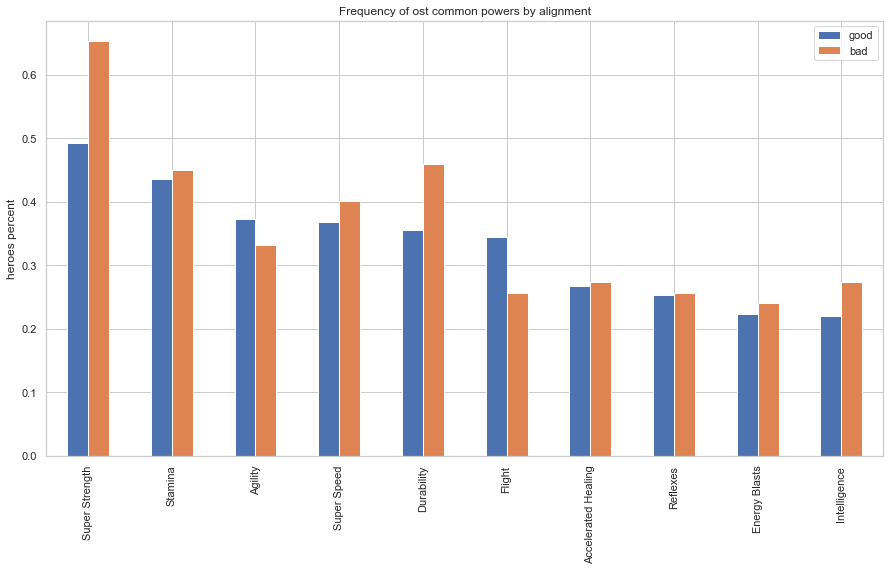

In [365]:
# Get powers columns
powers = power.columns[1:].values

# Get frequency of each power
freq_powers = pd.DataFrame()
freq_powers['good'] = 1*bonus_df[powers][bonus_df['Alignment'] == 'good'].sum() / bonus_df[bonus_df['Alignment'] == 'good'].shape[0]
freq_powers['bad'] = 1*bonus_df[powers][bonus_df['Alignment'] == 'bad'].sum() / bonus_df[bonus_df['Alignment'] == 'bad'].shape[0]

# Sort values
freq_powers = freq_powers.sort_values(by=['good', 'bad'], ascending=False)

freq_powers[:10].plot.bar(figsize=(15,8), label=False)
plt.title('Frequency of ost common powers by alignment')
plt.ylabel('heroes percent')

Text(0, 0.5, 'heroes percent')

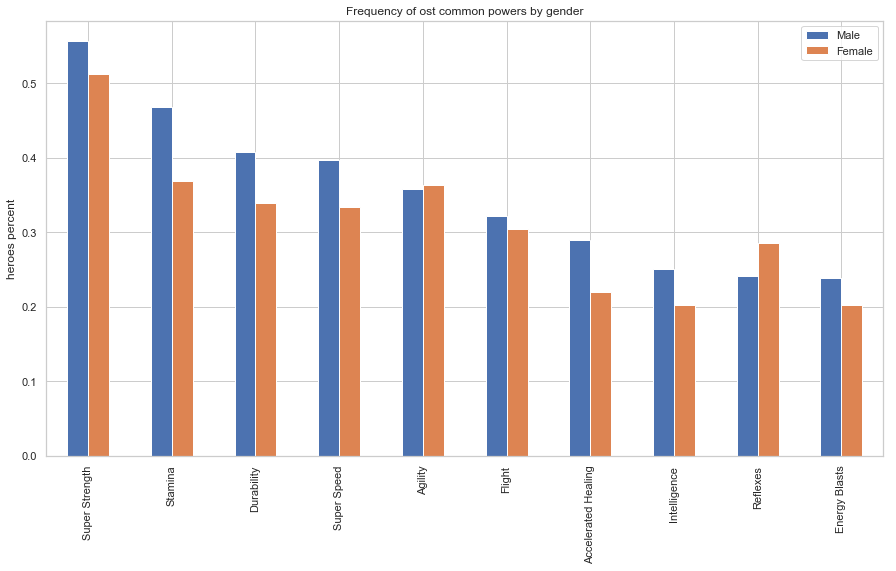

In [366]:
# Get powers columns
powers = power.columns[1:].values

# Get frequency of each power
freq_powers = pd.DataFrame()
freq_powers['Male'] = 1*bonus_df[powers][bonus_df['Gender'] == 'Male'].sum() / bonus_df[bonus_df['Gender'] == 'Male'].shape[0]
freq_powers['Female'] = 1*bonus_df[powers][bonus_df['Gender'] == 'Female'].sum() / bonus_df[bonus_df['Gender'] == 'Female'].shape[0]

# Sort values
freq_powers = freq_powers.sort_values(by=['Male', 'Female'], ascending=False)

freq_powers[:10].plot.bar(figsize=(15,8), label=False)
plt.title('Frequency of ost common powers by gender')
plt.ylabel('heroes percent')

### END